# The 5 Factors Affecting Academic Performance 
### Country, Gender, Wealth, Internet possession & Student's motivation.
## by Amira Noaman

## Investigation Overview

In this project, I selected 5 features that could enable us to predict the academic performance of students participating in the PISA survey. These 5 features are country, gender, wealth, internet possession & student's motivation.

## Dataset Overview

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. The aim of this test is to examine how well students have digested the school curriculum and how well prepared they are for life beyond school. Approximately a half million students in 65 economies joined the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally.

In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# Setup plot parameters
sb.set()
params = {
    'figure.figsize': (10, 6),
}
plt.rcParams.update(params)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [14]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa2012_clean.csv')

## Factor 1: Country

As mentioned, there are 65 participating countries, here I present to you the top countries of the achievers. The criteria of deciding whether a student is an achiever or not is all about choosing the students who score more than 75% in the specified subject. Results show that Singapore and China-Shanghai are competing for the first place except in the math subject where Chinese Taipei surpassed Singapore and ranked 2nd.

In [27]:
def top_countries(score):
    # Create a copy of original dataframe
    df_copy = df.copy()

    # We'll consider the upper quartile students
    upperQ = df_copy[score].max() * 0.75

    # Create top attribute
    df_copy['top'] = df_copy[score] > upperQ

    # Find percentage of top students in countries
    topStudentsCountries = df_copy.groupby('country').top.mean().mul(100)

    # Plot
    #sort values sorts the data asscendingly so we take the last 5 values which represent the largest values
    topStudentsCountries.sort_values().tail(5).plot(kind='barh') 
    plt.xlim(0, topStudentsCountries.max() + 10)
    plt.title(score)
    plt.xlabel(None)
    plt.ylabel(None)

    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    # Write the total number after the bar
    indexes, labels = plt.yticks()
    for index, label in zip(indexes, labels):
        value = topStudentsCountries[label.get_text()]
        plt.text(y=index, x=value, s='{:.1f}%'.format(value), va='center')

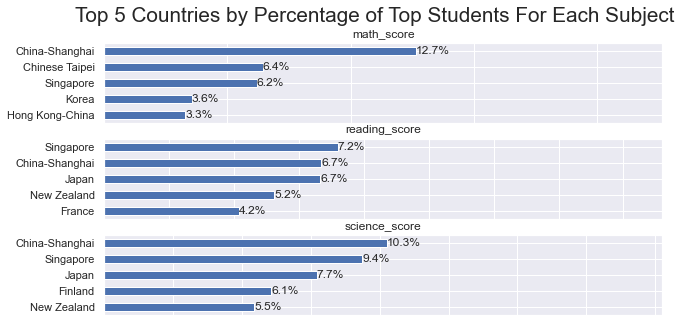

In [28]:
plt.figure(figsize=[10, 5])
plt.suptitle('Top 5 Countries by Percentage of Top Students For Each Subject', size='xx-large')
# Plot Math
plt.subplot(3, 1, 1)
top_countries('math_score')

# Plot Reading
plt.subplot(3, 1, 2)
top_countries('reading_score')

# Plot Science
plt.subplot(3, 1, 3)
top_countries('science_score')

## Factor 2: Gender

My analysis was able to exactly identify which gender exceeds the other in the specific subjects. For instance, males are more clever in math than females, however females outperform the males in reading. Both of them are almost equivalent when it comes to science

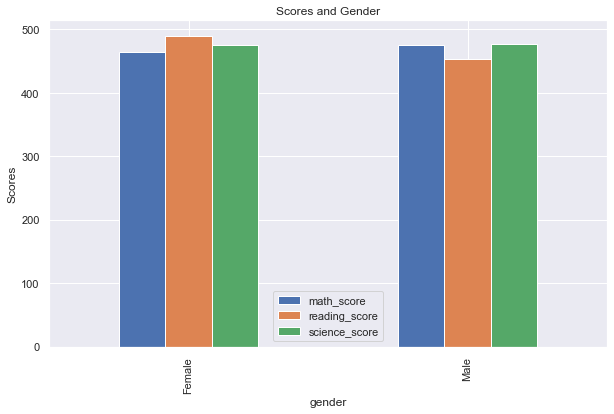

In [16]:
data = df.groupby('gender')[['math_score', 'reading_score', 'science_score']].mean()
ax = data.plot.bar()
plt.ylabel('Scores')
plt.title('Scores and Gender');

## Factor 3: Wealth

I constructed a pair plot which includes a correlation between the wealth index and the 3 subjects. None of them showed any correlation with being a successful student. Actually this can be an encouraging fact for anyone with few resources since it clearly shows that you don't have to be wealthy to be successful.

In [21]:
numeric_vars = ['math_score', 'reading_score', 'science_score', 'wealth_index']
categoric_vars = ['gender', 'internet_possession']

# Let's take a sample of 1000 students for faster processing 
samples = np.random.choice(df.shape[0], 1000, replace=False)
students_sample = df.loc[samples, :]

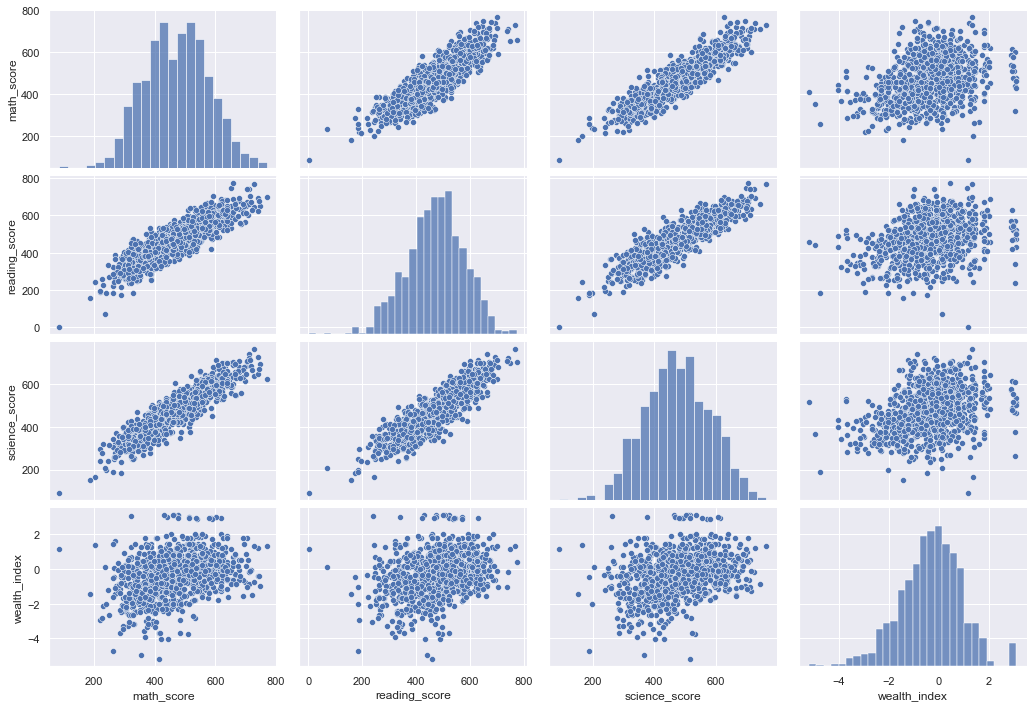

In [38]:
g = sb.pairplot(data=students_sample, vars=numeric_vars);
g.fig.set_size_inches(15,10)

## Factor 4: Internet

The constructed bar chart clearly shows that having access to the internet will definitely help the student achieve higher scores and this was proved for all 3 subjects not only for one. 

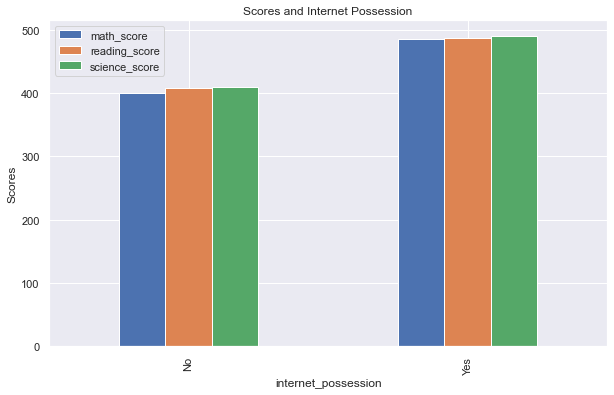

In [18]:
data = df.groupby('internet_possession')[['math_score', 'reading_score', 'science_score']].mean()
ax = data.plot.bar()
plt.ylabel('Scores')
plt.title('Scores and Internet Possession');

## Factor 5: Motivation

To me, this was one of the weirdest results that I didn't expect. I found that the motivation is not correlated by any means with the high scores in any of the subject and adding to this in the heatmap there was a negative correlation not just uncorrelated attributes.

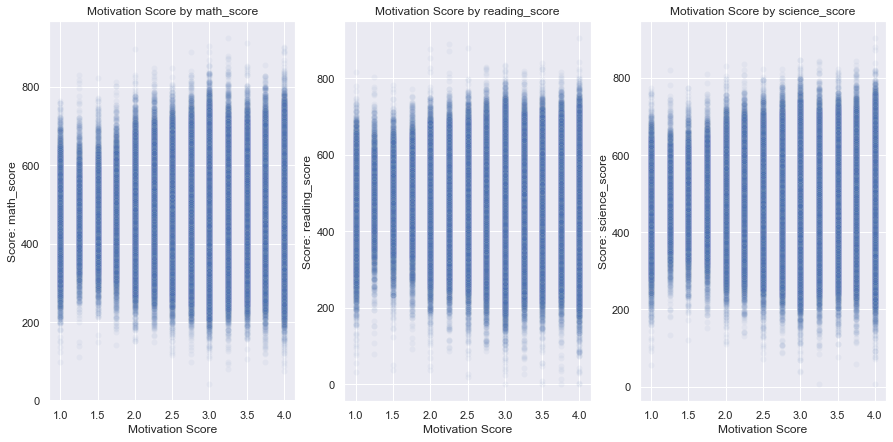

In [37]:
fig, ax= plt.subplots(nrows=1,ncols=3,figsize=[15,7])
ax=ax.flatten()

i=0
scores = ['math_score','reading_score','science_score']
for course in scores:
    plt.sca(ax[i])
    
    sb.scatterplot(x=df['motivation'],y=df[course],alpha=.05)
    ax[i].set_ylabel('Score: {}'.format(course))
    ax[i].set_xlabel('Motivation Score')
    ax[i].set_title('Motivation Score by {}'.format(scores[i]))
    i+=1


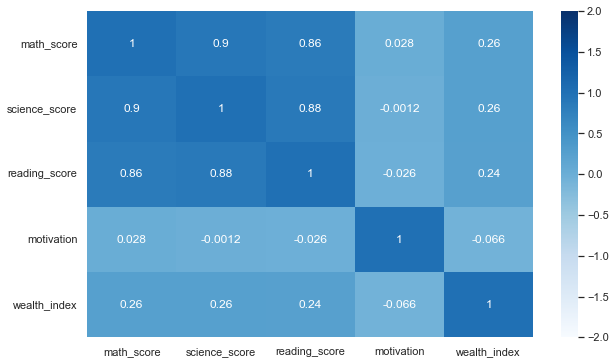

In [20]:
sb.heatmap(data=df[['math_score','science_score','reading_score','motivation','wealth_index']].corr(),
           center=0, cmap="Blues",annot=True, vmin=-2, vmax=2);